In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("wdbc.data")

In [3]:
# Add column names 
df.columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", 
              "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concavity Points",
              "Mean Symmetry", "Mean Fractal Dimension", "Radius SE", "Texture SE", "Perimeter SE",
              "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE", "Concavity Points SE",
              "Symmetry SE", "Fractal Dimension SE", "Worst Radius", "Worst Texture", 
              "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", 
              "Worst Concavity", "Worst Concavity Points", "Worst Symmetry", "Worst Fractal Dimension"]

In [4]:
# Drop ID column (not useful for training)
df.drop("ID", axis=1, inplace=True)

In [5]:
# Handle missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concavity Points      0
Mean Symmetry              0
Mean Fractal Dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concavity Points SE        0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concavity Points     0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64


In [6]:
# Encode Diagnosis: M = 1 (Malignant), B = 0 (Benign)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

In [7]:
# Split features and labels
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

In [8]:
# Standardize the features (K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # All data is used for clustering

In [9]:
# Train-test split (for KNN, MLP)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (454, 30)
Shape of test set: (114, 30)


### Supervised:KNN

In [11]:
#import KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

In [14]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


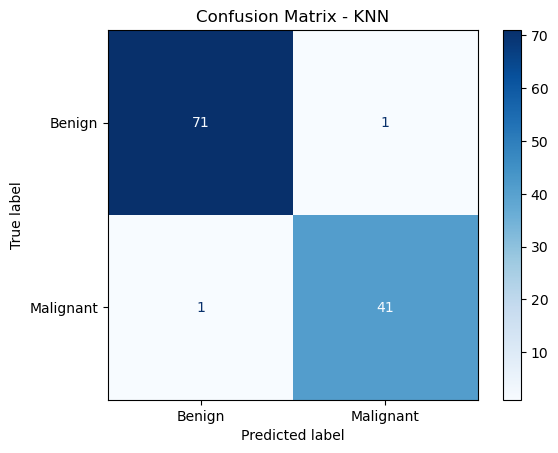

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

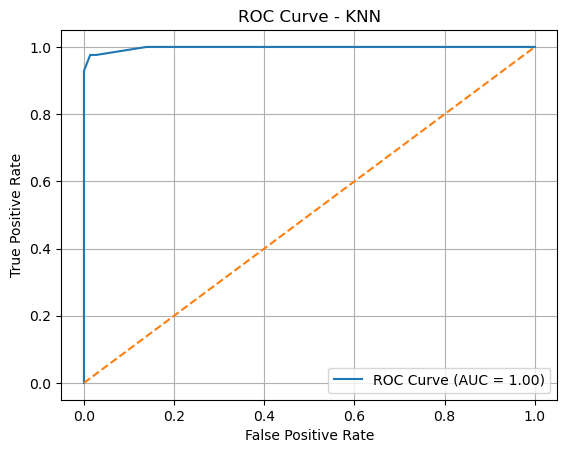

AUC: 0.9976851851851852


In [16]:
#ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc =roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid(True)
plt.show()
print("AUC:",roc_auc)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [18]:
original_knn = KNeighborsClassifier()  
original_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': list(range(1, 31)),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

In [20]:
# Initialize KNN model
knn = KNeighborsClassifier()

In [21]:
# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [22]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:",grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9669597069597069


In [23]:
# Evaluate best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


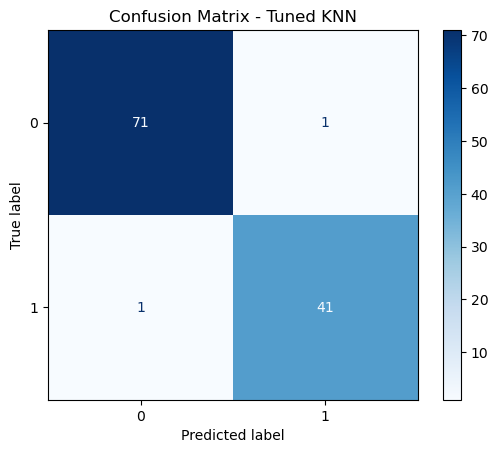

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned KNN")
plt.grid(False)
plt.show()

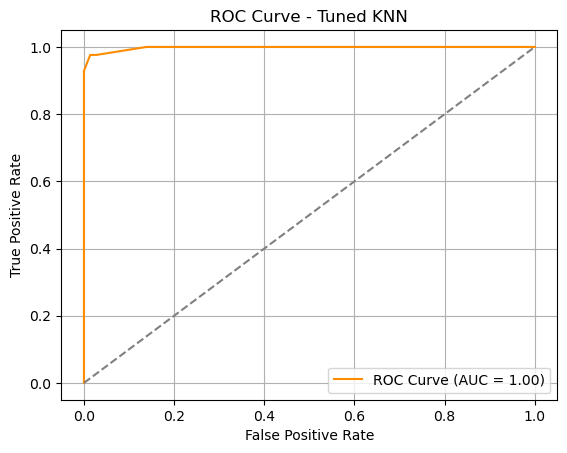

AUC: 0.9976851851851852


In [25]:
#  ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC:", roc_auc)

In [26]:
print("Original model accuracy:", accuracy_score(y_test, original_knn.predict(X_test)))
print("Tuned model accuracy:", accuracy_score(y_test, best_knn.predict(X_test)))


Original model accuracy: 0.9824561403508771
Tuned model accuracy: 0.9824561403508771


### Unsupervised: K-Means

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import mode

In [29]:
# Apply K-Means Clustering
# 2 clusters for 2 class 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_  # get predicted cluster labels

C:\Users\heiia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [30]:
# Evaluate clustering
ari = adjusted_rand_score(y, cluster_labels)
sil_score = silhouette_score(X_scaled, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.6759
Silhouette Score: 0.3447


In [31]:
# Manual mapping of clusters to class labels
def map_clusters_to_labels(y_true, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):                 # Loop cluster 0 and 1 
        mask = cluster_labels == cluster                      # True where cluster == current
        labels[mask] = mode(y_true[mask], keepdims=True)[0]   # Assign most frequent real label
    return labels

mapped_labels = map_clusters_to_labels(y, cluster_labels)     

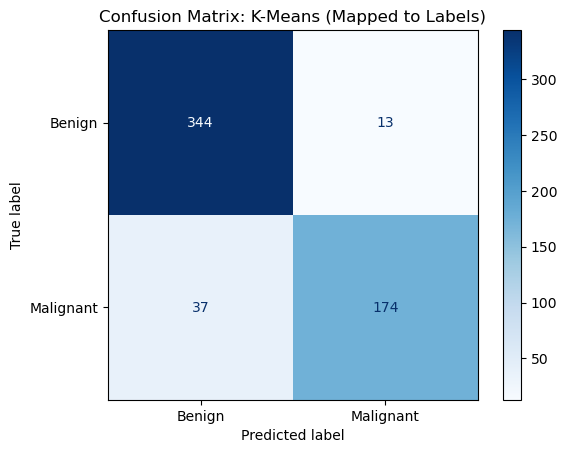

In [32]:
# Confusion matrix
cm = confusion_matrix(y, mapped_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: K-Means (Mapped to Labels)")
plt.show()


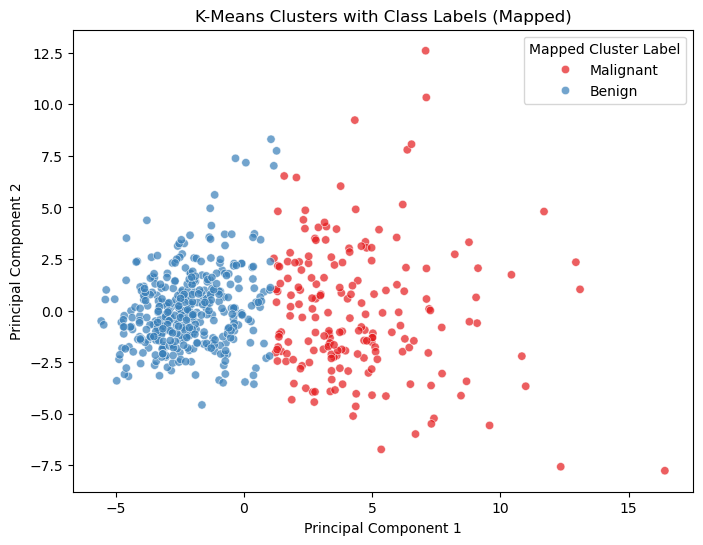

Total Variance Captured: 0.6319702820480582


In [33]:
#  PCA + CLUSTER VISUALIZATION

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

label_names = np.array(["Benign", "Malignant"])
cluster_names = label_names[mapped_labels]

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_names, palette='Set1', alpha=0.7)
plt.title('K-Means Clusters with Class Labels (Mapped)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Mapped Cluster Label')
plt.show()

print("Total Variance Captured:", np.sum(pca.explained_variance_ratio_))

In [34]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y, mapped_labels, target_names=["Benign", "Malignant"]))
print("Accuracy:",accuracy_score(y,mapped_labels))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.96      0.93       357
   Malignant       0.93      0.82      0.87       211

    accuracy                           0.91       568
   macro avg       0.92      0.89      0.90       568
weighted avg       0.91      0.91      0.91       568

Accuracy: 0.9119718309859155


In [35]:
# Hyperparameter Tuning
print("\nSilhouette Scores for different K:")
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    labels = km.labels_
    score = silhouette_score(X_scaled, labels)
    ari_score = adjusted_rand_score(y, labels)
    print(f"k = {k}, ARI = {ari_score:.4f}, Silhouette Score = {score:.4f}")


Silhouette Scores for different K:
k = 2, ARI = 0.6759, Silhouette Score = 0.3447
k = 3, ARI = 0.5408, Silhouette Score = 0.3160
k = 4, ARI = 0.4763, Silhouette Score = 0.1811
k = 5, ARI = 0.4487, Silhouette Score = 0.1509


C:\Users\heiia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\heiia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\heiia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\heiia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

### Advanced: NN (MLP)

In [37]:
# Import library
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [38]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Define and train MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [40]:
# Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]

In [41]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771


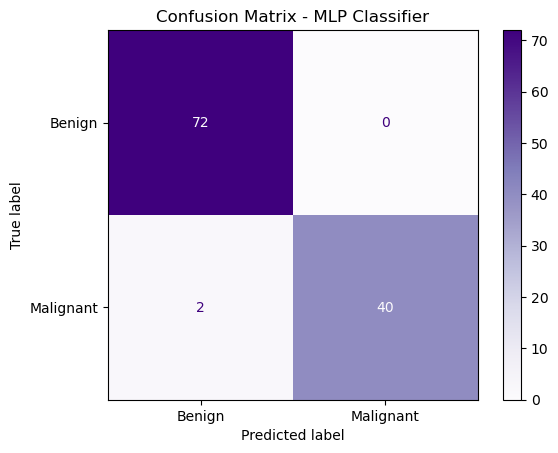

In [42]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - MLP Classifier")
plt.show()

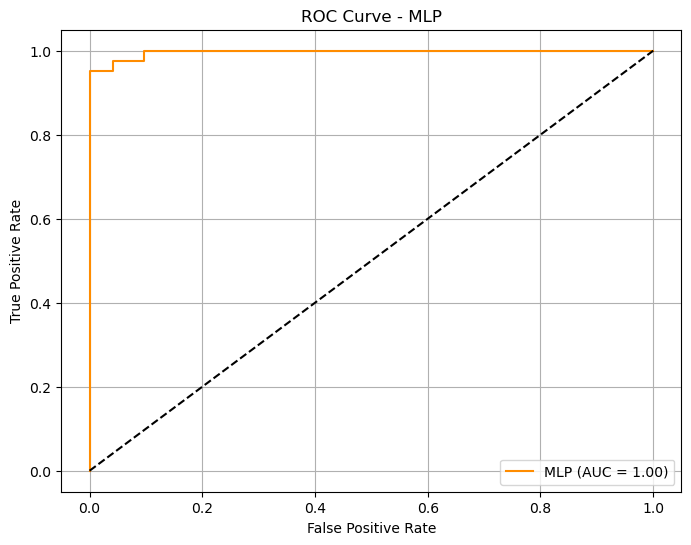

AUC (Basic MLP): 0.9967


In [43]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC (Basic MLP): {roc_auc:.4f}")

In [44]:
# GridSearchCV for MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [45]:
# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (64, 32)],  # Including (64, 32) as used earlier
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

In [46]:
# Initialize the base MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [47]:
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,                      # Use all available cores
    verbose=2                       # Verbose output for tracking progress
)

In [48]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50),
                                                (64, 32)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

In [49]:
# Check best model and its score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'solver': 'sgd'}
Best Cross-Validation Accuracy: 0.9757753357753357


In [50]:
# Evaluate the best model on the test set
best_mlp = grid_search.best_estimator_

y_pred = best_mlp.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 0.9912280701754386


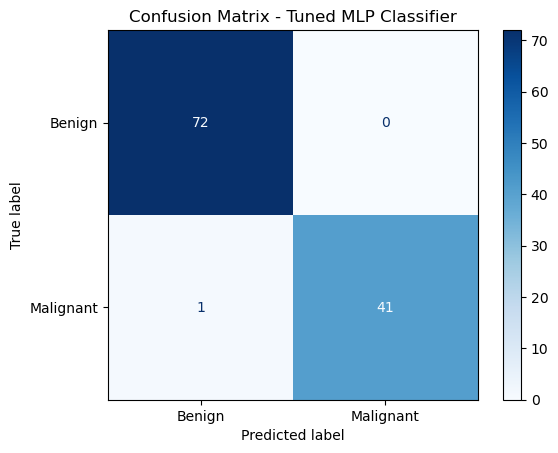

In [51]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    best_mlp, X_test_scaled, y_test,
    display_labels=["Benign", "Malignant"],
    cmap='Blues'
)
plt.title("Confusion Matrix - Tuned MLP Classifier")
plt.show()

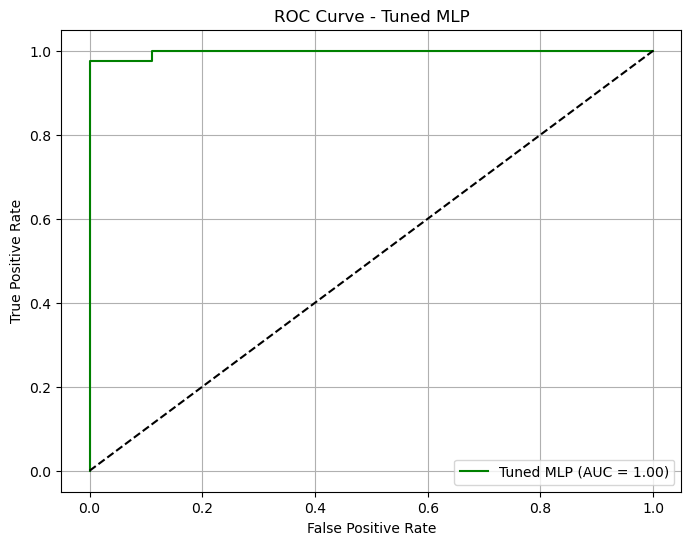

AUC (Tuned MLP): 0.9974


In [52]:
# Predict probabilities with the best (tuned) model
y_proba_best = best_mlp.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for the tuned model
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_best, tpr_best, label=f'Tuned MLP (AUC = {roc_auc_best:.2f})', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned MLP")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the AUC value
print(f"AUC (Tuned MLP): {roc_auc_best:.4f}")
